In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np 
from sklearn.preprocessing import MinMaxScaler


/home/etudiant/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
## path file result
str_filename="history_slide1.csv"

# Open the file and check header

In [3]:
fh=open(str_filename)
csv_reader=csv.reader(fh)
csv_header=next(csv_reader)
csv_header


['EPOCHS',
 'BATCH',
 'ACCURACY',
 'VAL_ACCURACY',
 'LOSS',
 'VAL_LOSS',
 'ROC',
 'PR',
 'VAL_ROC',
 'VAL_PR',
 'PRECISION',
 'RECALL',
 'VAL_PRECISION',
 'VAL_RECALL',
 'BIN_ACC',
 'VAL_BIN_ACC',
 'LR']

# Visualize the file

In [4]:
df_sig=pd.read_csv(str_filename,names=csv_header,header=0)
df_sig

,EPOCHS,BATCH,ACCURACY,VAL_ACCURACY,LOSS,VAL_LOSS,ROC,PR,VAL_ROC,VAL_PR,PRECISION,RECALL,VAL_PRECISION,VAL_RECALL,BIN_ACC,VAL_BIN_ACC,LR
0,0,64,0.542363,0.499746,0.000761,0.002082,0.541511,0.525503,0.514495,0.496148,0.542363,0.542363,0.499746,0.499746,0.542363,0.499746,1.000000e-05
1,1,64,0.661299,0.497037,0.000678,0.002223,0.741005,0.725581,0.504525,0.485675,0.661299,0.661299,0.497037,0.497037,0.661299,0.497037,1.000000e-05
2,2,64,0.705457,0.524132,0.000647,0.002252,0.766919,0.757485,0.565742,0.539380,0.705457,0.705457,0.524132,0.524132,0.705457,0.524132,1.000000e-05
3,3,64,0.726939,0.524132,0.000619,0.002250,0.797059,0.789473,0.577551,0.552539,0.726939,0.726939,0.524132,0.524132,0.726939,0.524132,2.000000e-06
4,4,64,0.747384,0.530906,0.000611,0.002248,0.806738,0.797109,0.587683,0.563835,0.747384,0.747384,0.530906,0.530906,0.747384,0.530906,2.000000e-06
5,5,64,0.727918,0.530906,0.000609,0.002249,0.803309,0.798775,0.588914,0.564745,0.727918,0.727918,0.530906,0.530906,0.727918,0.530906,4.000000e-07
6,6,64,0.740242,0.530906,0.000606,0.002249,0.807778,0.800882,0.591537,0.568214,0.740242,0.740242,0.530906,0.530906,0.740242,0.530906,4.000000e-07
7,7,64,0.735538,0.530906,0.000604,0.002249,0.807832,0.802494,0.591850,0.568294,0.735538,0.735538,0.530906,0.530906,0.735538,0.530906,8.000000e-08
8,8,64,0.736150,0.530906,0.000606,0.002248,0.808920,0.801507,0.592315,0.568719,0.736150,0.736150,0.530906,0.530906,0.736150,0.530906,8.000000e-08
9,9,64,0.736812,0.530906,0.000609,0.002248,0.803724,0.796722,0.592334,0.568599,0.736813,0.736813,0.530906,0.530906,0.736812,0.530906,1.600000e-08


# LOSS & ACCURACY

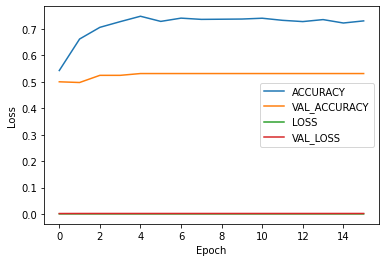

In [5]:
plt.plot(df_sig['ACCURACY'])
plt.plot(df_sig['VAL_ACCURACY'])
plt.plot(df_sig['LOSS'])
plt.plot(df_sig['VAL_LOSS'])
plt.legend(['ACCURACY','VAL_ACCURACY','LOSS','VAL_LOSS'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# LOSS ONLY

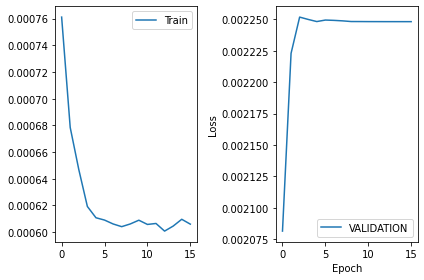

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(df_sig['LOSS'])
ax2.plot(df_sig['VAL_LOSS'])
ax1.legend(['Train','VALIDATION'])
ax2.legend(['VALIDATION'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

# Others metrics

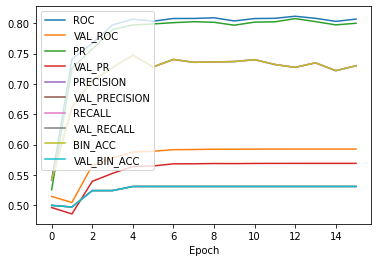

In [7]:
plt.plot(df_sig['ROC'])
plt.plot(df_sig['VAL_ROC'])
plt.plot(df_sig['PR'])
plt.plot(df_sig['VAL_PR'])


plt.plot(df_sig['PRECISION'])
plt.plot(df_sig['VAL_PRECISION'])
plt.plot(df_sig['RECALL'])
plt.plot(df_sig['VAL_RECALL'])
plt.plot(df_sig['BIN_ACC'])
plt.plot(df_sig['VAL_BIN_ACC'])


plt.legend(['ROC','VAL_ROC','PR','VAL_PR','PRECISION','VAL_PRECISION','RECALL','VAL_RECALL','BIN_ACC','VAL_BIN_ACC'])
plt.xlabel('Epoch')
plt.show()

## Confusion Matrix for train set 

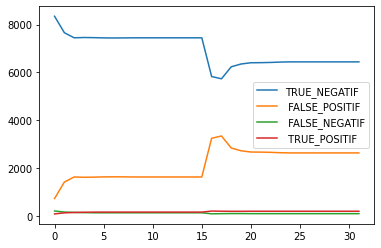

    TRUE_NEGATIF   FALSE_POSITIF   FALSE_NEGATIF   TRUE_POSITIF
0       1.000000        0.000000        1.000000       0.000000
1       0.736621        0.263379        0.621849       0.378151
2       0.655199        0.344801        0.495798       0.504202
3       0.660168        0.339832        0.428571       0.571429
4       0.657875        0.342125        0.369748       0.630252
5       0.654052        0.345948        0.361345       0.638655
6       0.652523        0.347477        0.361345       0.638655
7       0.653670        0.346330        0.361345       0.638655
8       0.655199        0.344801        0.361345       0.638655
9       0.655199        0.344801        0.361345       0.638655
10      0.655199        0.344801        0.361345       0.638655
11      0.655199        0.344801        0.361345       0.638655
12      0.655199        0.344801        0.361345       0.638655
13      0.655199        0.344801        0.361345       0.638655
14      0.655199        0.344801        

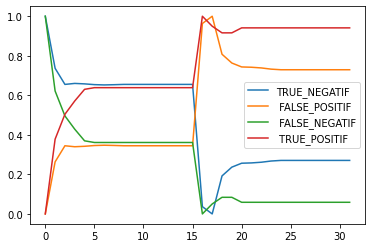

In [14]:
df = pd.read_csv("confusion_matrix.csv",skiprows=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64])
fig = df.plot()
plt.show()
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)
fig2 = normalized_df.plot()
plt.show()

## Confusion Matrix for Validation set 

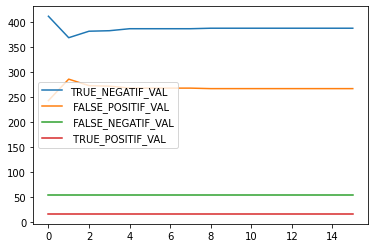

    TRUE_NEGATIF   FALSE_POSITIF   FALSE_NEGATIF   TRUE_POSITIF
0       1.000000        0.000000             0.0            0.0
1       0.000000        1.000000             0.0            0.0
2       0.302326        0.697674             0.0            0.0
3       0.325581        0.674419             0.0            0.0
4       0.418605        0.581395             0.0            0.0
5       0.418605        0.581395             0.0            0.0
6       0.418605        0.581395             0.0            0.0
7       0.418605        0.581395             0.0            0.0
8       0.441860        0.558140             0.0            0.0
9       0.441860        0.558140             0.0            0.0
10      0.441860        0.558140             0.0            0.0
11      0.441860        0.558140             0.0            0.0
12      0.441860        0.558140             0.0            0.0
13      0.441860        0.558140             0.0            0.0
14      0.441860        0.558140        

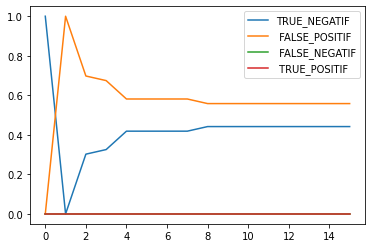

In [ ]:
df_val = pd.read_csv("confusion_matrix_val.csv",skiprows=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64])
fig_val = df_val.plot()
plt.show()
normalized_data_val = scaler.fit_transform(df_val)
normalized_df_val = pd.DataFrame(normalized_data_val, columns=df.columns)
print(normalized_df_val)
fig2 = normalized_df_val.plot()
plt.show()